<a href="https://colab.research.google.com/github/NguyenQuanManh/AI_PROJECT/blob/main/Train_Leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_apple=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
apple_set=train_apple.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/dataset/Train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
val=train_apple.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/dataset/Test',
                                          target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3200 images belonging to 4 classes.
Found 1620 images belonging to 4 classes.


In [ ]:
print(apple_set.class_indices,
      val.class_indices)

{'apple_black_rot': 0, 'apple_cedar_apple_rut': 1, 'apple_health': 2, 'apple_scrab': 3} {'apple_black_rot': 0, 'apple_cedar_apple_rut': 1, 'apple_health': 2, 'apple_scrab': 3}


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 19, 19, 128)     

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(apple_set, epochs=150, batch_size=128)

Epoch 1/150
100/100 [==============================] - 24s 234ms/step - loss: 1.4707 - accuracy: 0.3013
Epoch 2/150
100/100 [==============================] - 24s 237ms/step - loss: 1.1568 - accuracy: 0.5250
Epoch 3/150
100/100 [==============================] - 23s 234ms/step - loss: 0.7822 - accuracy: 0.7041
Epoch 4/150
100/100 [==============================] - 23s 234ms/step - loss: 0.6858 - accuracy: 0.7372
Epoch 5/150
100/100 [==============================] - 23s 233ms/step - loss: 0.5980 - accuracy: 0.7781
Epoch 6/150
100/100 [==============================] - 23s 233ms/step - loss: 0.5644 - accuracy: 0.7894
Epoch 7/150
100/100 [==============================] - 23s 229ms/step - loss: 0.4655 - accuracy: 0.8256
Epoch 8/150
100/100 [==============================] - 23s 230ms/step - loss: 0.4245 - accuracy: 0.8350
Epoch 9/150
100/100 [==============================] - 23s 233ms/step - loss: 0.3751 - accuracy: 0.8678
Epoch 10/150
100/100 [==============================] - 24s 239m

In [ ]:
model.save('leaf_apple.h5')

In [ ]:
model_h5=load_model('leaf_apple.h5')

1/1 [==============================] - 0s 16ms/step
Đây là loại: blackrot


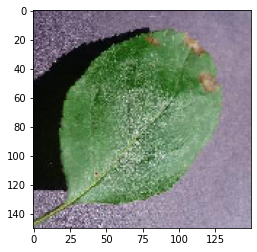

In [ ]:
img = load_img('/content/e43cb49a-44ff-4ee5-9dae-aa2e89fb643b___JR_FrgE.S 2927.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_h5.predict(img)
class_name=['blackrot','Cedar','health','scrab']
a= int(np.argmax(result,axis=1))
print("Đây là loại:", class_name[a])

In [ ]:
! jupyter nbconvert --to html /content/compare.ipynb

[NbConvertApp] Converting notebook /content/compare.ipynb to html
[NbConvertApp] Writing 429675 bytes to /content/compare.html
